<a href="https://colab.research.google.com/github/Sakhakhini/1/blob/main/In_class_exercise_05_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 04/12/2022)**


(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct _10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)_ in the training.

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score


In [ ]:
import re
from typing import Tuple

import pandas as pd
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (cross_val_predict, cross_val_score,
                                     cross_validate, train_test_split)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [ ]:
def clean_text(text: str) -> str:
    """Removes punctuation and numbers from text."""
    return re.sub('[^A-Za-z ]', '', text).strip()


def read_file(filepath: str) -> pd.DataFrame:
    with open(filepath, 'r') as f:
        data = [{
            'text': clean_text(line[1:]),
            'sentiment': int(line[0])
        } for line in f.readlines()]

    return pd.DataFrame(data)


df_train = read_file('./exercise09_datacollection/stsa-train.txt')
df_test = read_file('./exercise09_datacollection/stsa-test.txt')

df_train.head()

,text,sentiment
0,a stirring funny and finally transporting rei...,1
1,apparently reassembled from the cuttingroom fl...,0
2,they presume their audience wo nt sit still fo...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker s bartleby should have been th...,1


In [ ]:
vectorizer = TfidfVectorizer(decode_error='ignore',
                             stop_words=stopwords.words('english'))

X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

y_train = df_train['sentiment']
y_test = df_test['sentiment']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6920, 14400), (6920,), (1821, 14400), (1821,))

In [ ]:
def compute_scores(predictions, targets, prepend):
    accuracy = metrics.accuracy_score(targets, predictions)
    recall = metrics.recall_score(targets, predictions)
    precision = metrics.precision_score(targets, predictions)
    f1 = metrics.f1_score(targets, predictions)

    return {
        f'{prepend}_accuracy': accuracy,
        f'{prepend}_recall': recall,
        f'{prepend}_precision': precision,
        f'{prepend}_f1': f1
    }


def fit_and_test(X_train, y_train, X_test, y_test, model):
    """Fits the model using 10-fold cross validation and then evaluates it on the test set."""
    # Split the data into training and evaluation sets (20%)
    X_train, X_eval, y_train, y_eval = train_test_split(X_train,
                                                        y_train,
                                                        test_size=0.2)

    # Fit the
    model = model.fit(X_train, y_train)

    # Evaluate the model using 10-fold cross validation
    eval_predictions = cross_val_predict(model,
                                         X_eval,
                                         y_eval,
                                         cv=10,
                                         n_jobs=-1)
    eval_scores = compute_scores(eval_predictions, y_eval, 'eval')

    # Predict the test set using the final model
    test_predictions = cross_val_predict(model,
                                         X_test,
                                         y_test,
                                         cv=10,
                                         n_jobs=-1)
    test_scores = compute_scores(test_predictions, y_test, 'test')

    return model, eval_scores, test_scores


In [ ]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]
model_and_scores = [
    fit_and_test(X_train, y_train, X_test, y_test, model) for model in models
]

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/mini

[12:54:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:36] WARNING: /home

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/mini

[12:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:01] WARNING: /home

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinyugo-maina/mini

[12:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:35] WARNING: /home

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
df_scores = pd.DataFrame()

for model, eval_scores, test_scores in model_and_scores:
    df_scores = df_scores.append(
        {
            'model': str(model),
            **eval_scores,
            **test_scores
        }, ignore_index=True)

df_scores

,model,eval_accuracy,eval_recall,eval_precision,eval_f1,test_accuracy,test_recall,test_precision,test_f1
0,MultinomialNB(),0.719653,0.755043,0.706199,0.729805,0.733663,0.748075,0.726496,0.737127
1,SVC(),0.678468,0.857538,0.644491,0.735905,0.731466,0.739274,0.727273,0.733224
2,KNeighborsClassifier(),0.664740,0.751715,0.659446,0.702564,0.512356,0.028603,0.838710,0.055319
3,DecisionTreeClassifier(),0.578035,0.502116,0.606474,0.549383,0.624931,0.562156,0.641960,0.599413
4,RandomForestClassifier(),0.661127,0.771390,0.659429,0.711029,0.647996,0.457646,0.737589,0.564834
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.643786,0.693198,0.630263,0.660234,0.646348,0.605061,0.658683,0.630734


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link. https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means,
DBSCAN,
Hierarchical clustering.

You can refer to of the codes from the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import cluster 
from sklearn.decomposition import TruncatedSVD
import numpy as np 
from itertools import cycle, islice

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('./Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,407907.0,226.867155,273.006259,1.73,79.99,144.71,269.99,2598.0
Rating,413840.0,3.819578,1.548216,1.00,3.00,5.00,5.00,5.0
Review Votes,401544.0,1.507237,9.163853,0.00,0.00,0.00,1.00,645.0


Text(0.5, 1.0, 'Rating Count')

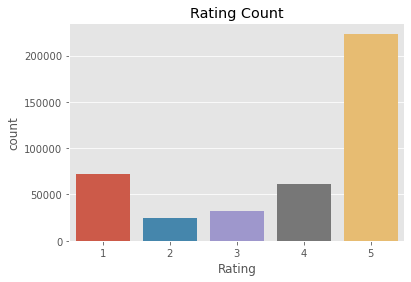

In [ ]:
sns.countplot(x=df['Rating']).set_title('Rating Count')

In [ ]:
def clean_review(review: str) -> str:
    """Clean the review and remove some unwanted words"""
    review = review.lower()
    # remove stopwords 
    review = ' '.join(list(filter(lambda x: x not in stopwords.words('english'), review.split())))
    # remove punctuation and numbers
    review = re.sub('[^A-Za-z ]', '', review).strip()

    return review

df_subset = df.head(n=10000)
df_subset[['Reviews']] = df_subset[['Reviews']].fillna('')
X = df_subset[['Reviews']].applymap(clean_review)
y = df_subset['Rating']

print(X.shape, y.shape)
X.head()

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(10000, 1) (10000,)


,Reviews
0,feel lucky found used phone us used hard all ...
1,nice phone nice grade pantach revue clean set ...
2,pleased
3,works good goes slow sometimes good phone love
4,great phone replace lost phone thing volume bu...


In [ ]:
def fit_and_cluster(X, model):
    # Fit model 
    model = model.fit(X)
    # Predict using the model
    if hasattr(model, "labels_"):
        y_pred = model.labels_.astype(int)
    else:
        y_pred = model.predict(X)

    return y_pred

In [ ]:
X_vec = TfidfVectorizer().fit_transform(X['Reviews'].values)
X_vec.shape

(10000, 12586)

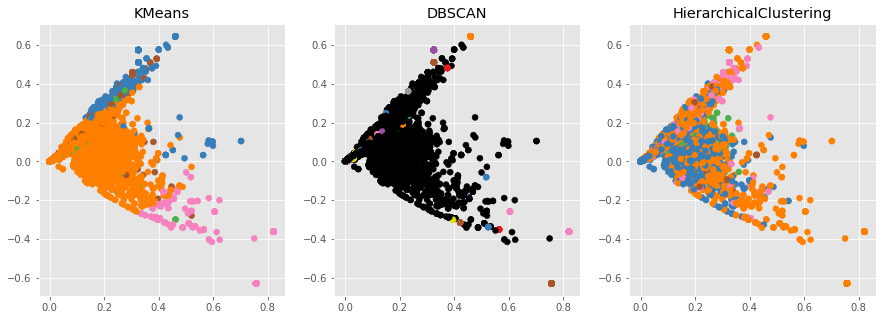

In [ ]:
model_configs = [('KMeans', cluster.KMeans(n_clusters=5)),
                 ('DBSCAN', cluster.DBSCAN(eps=0.3, n_jobs=-1)),
                 ('HierarchicalClustering',
                  cluster.Birch(n_clusters=5))]

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(15, 5))
axes = axes.flatten()

X_svd = TruncatedSVD(n_components=2).fit_transform(X_vec)
for idx, (model_name, model) in enumerate(model_configs):
    # Fit and cluster using the given model
    y_pred = fit_and_cluster(X_vec, model)
    # Plot the predictions of the method
    colors = [
        "#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3",
        "#999999", "#e41a1c", "#dede00"
    ]
    colors = np.array(list(islice(
        cycle(colors),
        int(max(y_pred) + 1),
    )))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    axes[idx].scatter(X_svd[:, 0], X_svd[:, 1], color=colors[y_pred])
    axes[idx].set_title(model_name)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.


In [ ]:
# K-Means is able to split the data well according to clusters as can be seen from the above plots while
# DBSCAN has a lot of overlap between clusters on the other hand Hierarchical clustering also performs fairly well splitting the data into multiple clusters.